In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
total_data = {
    "Twitter_tweets": 0,
    "Reddit_comments": 0,
    "Instagram_comments":0
}

tweets_data = {}
reddit_data = {}
instagram_data = {
    'Gov.sg':{},
    'Mothership':{}
}

# Twitter

In [20]:
mypath = ""
folder_name='Users/joshuawong/Documents/GitHub/Covid-19-Singapore-Analysis/Data/Twitter Data/Cleaned Data/Policies'
file_path = f'{mypath}/{folder_name}/'
files = [filename for filename in os.listdir(file_path) if filename.endswith('.csv') and not filename.startswith('Stay')]
files

['Tracetogether.csv',
 'Safe entry.csv',
 'Vaccination.csv',
 'Circuit breaker.csv',
 'Foreign worker.csv',
 'Safe distancing.csv']

In [34]:
df = []

for file in files:
    temp = pd.read_csv(f'{file_path}{file}')
    df.append(temp)

output = pd.concat(df)

In [36]:
output.to_csv('/Users/joshuawong/Documents/GitHub/Covid-19-Singapore-Analysis/Data/Twitter Data/Cleaned Data/Policies/test.csv')

In [22]:
for file in files:
    df = pd.read_csv(f'{file_path}{file}')
    total_data['Twitter_tweets'] += len(df)

    key_word = " ".join(file[:-4].split('_'))
    tweets_data[key_word] = len(df)

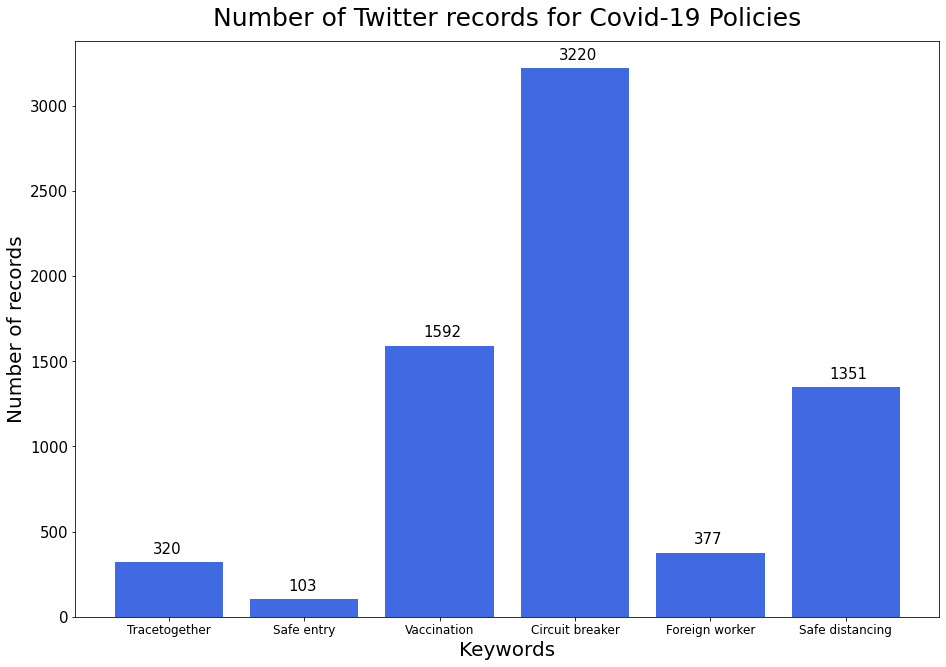

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
key_words = list(tweets_data.keys())
num_records = list(tweets_data.values())
ax.bar(key_words, num_records, color='royalblue')
plt.title("Number of Twitter records for Covid-19 Policies", fontsize = 25, pad=15)
plt.xlabel("Keywords", fontsize = 20)
plt.ylabel("Number of records",fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
for i in range(len(key_words)):
    plt.text(x= i-0.12 , y = num_records[i]+50 , s=f"{num_records[i]}" , fontdict=dict(fontsize=15))

plt.tight_layout()
plt.show()

# Instagram

In [56]:
mypath = "."
folder_name_1='Instagram Data/Gov.sg/Cleaned Data'
folder_name_2='Instagram Data/Mothership/Cleaned Data'
file_path_1 = f'{mypath}/{folder_name_1}/'
file_path_2 = f'{mypath}/{folder_name_2}/'
files_1 = [filename for filename in os.listdir(file_path_1) if filename.endswith('.csv')]
files_2 = [filename for filename in os.listdir(file_path_2) if filename.endswith('.csv')]
files_1

['CNY.csv', 'Phase 3.csv', 'Phase 2.csv', 'Vaccination.csv']

In [59]:
for file in files_1:
    df = pd.read_csv(f'{file_path_1}{file}')
    total_data['Instagram_comments'] += len(df)

    keyword = file[:-4]
    instagram_data['Gov.sg'][keyword] = len(df)

for file in files_2:
    df = pd.read_csv(f'{file_path_2}{file}')
    total_data['Instagram_comments'] += len(df)

    keyword = file[:-4]
    instagram_data['Mothership'][keyword] = len(df)

In [69]:
num_comments_per_keyword = {}

for key in instagram_data.keys():
    for k, v in instagram_data[key].items():
        if k not in num_comments_per_keyword:
            num_comments_per_keyword[k] = v
        else:
            num_comments_per_keyword[k] += v

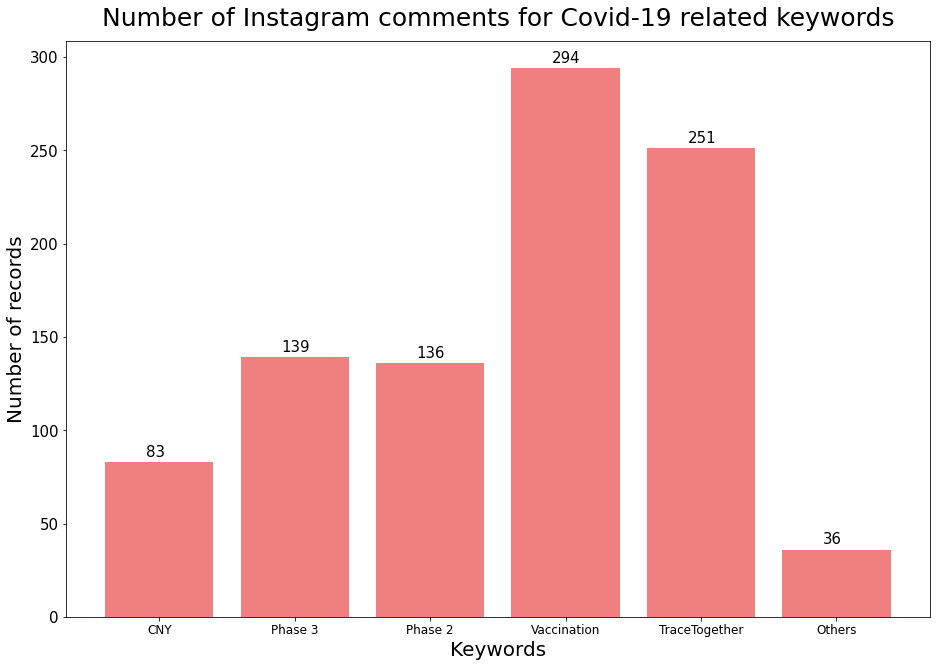

In [74]:
fig = plt.figure()
ax = fig.add_axes([0, 0,2,2])
key_words = list(num_comments_per_keyword.keys())
num_records = list(num_comments_per_keyword.values())
ax.bar(key_words, num_records, color='lightcoral')
plt.title("Number of Instagram comments for Covid-19 related keywords", fontsize = 25, pad=15)
plt.xlabel("Keywords", fontsize = 20)
plt.ylabel("Number of records",fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
for i in range(len(key_words)):
    plt.text(x= i-0.10 , y = num_records[i]+3 , s=f"{num_records[i]}" , fontdict=dict(fontsize=15))

plt.tight_layout()
plt.show()

# Reddit

In [75]:
mypath = "."
folder_name='Reddit Data/Cleaned Data'
file_path = f'{mypath}/{folder_name}/'
files = [filename for filename in os.listdir(file_path) if filename.endswith('.csv')]
files

['Reddit vaccination comments.csv',
 'Reddit circuit breaker comments.csv',
 'Reddit TraceTogether comments.csv']

In [77]:
for file in files:
    df = pd.read_csv(f'{file_path}{file}')
    total_data['Reddit_comments'] += len(df)

    key_word = file[7:-13]
    reddit_data[key_word] = len(df)

In [80]:
reddit_data

{'vaccination': 633, 'circuit breaker': 1688, 'TraceTogether': 2185}

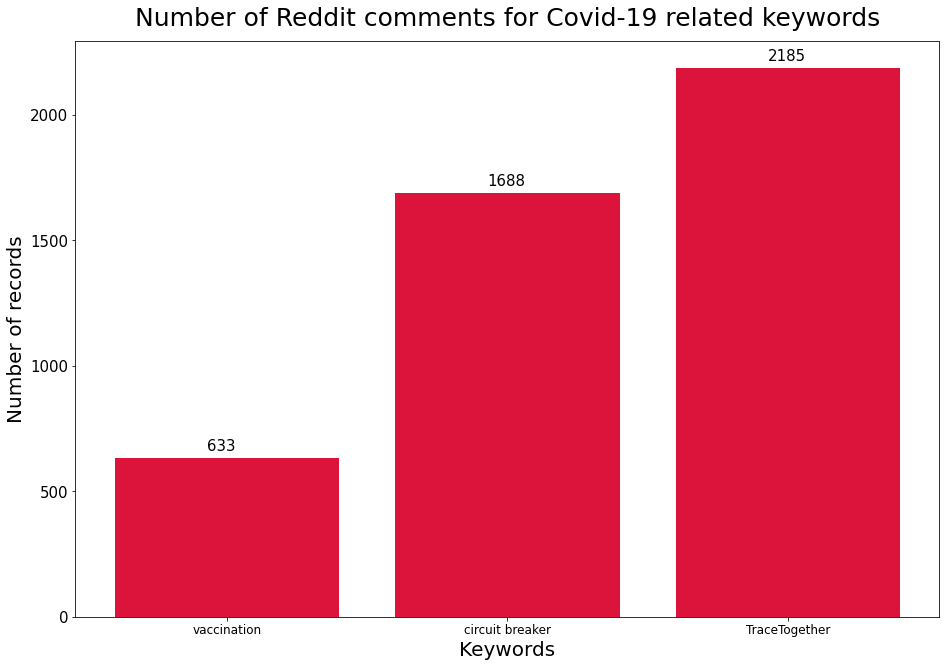

In [85]:
fig = plt.figure()
ax = fig.add_axes([0, 0,2,2])
key_words = list(reddit_data.keys())
num_records = list(reddit_data.values())
ax.bar(key_words, num_records, color='crimson')
plt.title("Number of Reddit comments for Covid-19 related keywords", fontsize = 25, pad=15)
plt.xlabel("Keywords", fontsize = 20)
plt.ylabel("Number of records",fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
for i in range(len(key_words)):
    plt.text(x= i-0.07, y = num_records[i]+30, s=f"{num_records[i]}" , fontdict=dict(fontsize=15))

plt.tight_layout()
plt.show()

# Total data

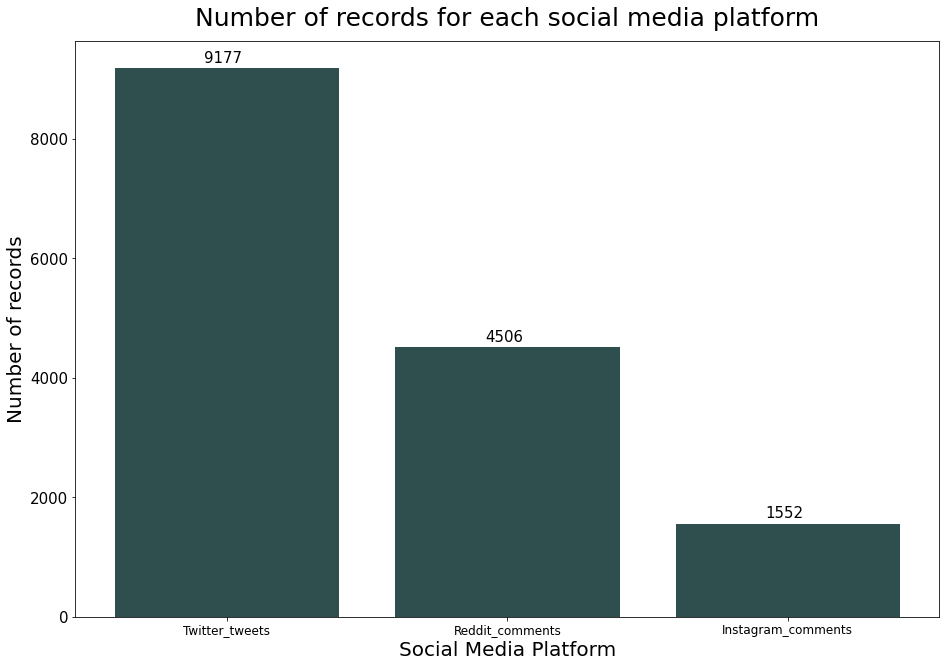

In [89]:
fig = plt.figure()
ax = fig.add_axes([0, 0,2,2])
key_words = list(total_data.keys())
num_records = list(total_data.values())
ax.bar(key_words, num_records, color='darkslategrey')
plt.title("Number of records for each social media platform", fontsize = 25, pad=15)
plt.xlabel("Social Media Platform", fontsize = 20)
plt.ylabel("Number of records",fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
for i in range(len(key_words)):
    plt.text(x= i-0.08, y = num_records[i]+100, s=f"{num_records[i]}" , fontdict=dict(fontsize=15))

plt.tight_layout()
plt.show()